N.B.: BWNT is not freely distributable, so not included in this repo.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import gensim
import cPickle as pickle
import editdistance
import csv

In [4]:
import plotly.plotly as ply
import plotly.graph_objs as plgo

In [5]:
shico_dn = '/home/patrick/projects/ShiCo Sprint/'

In [7]:
m1 = model_1940_1y = gensim.models.Word2Vec.load_word2vec_format(shico_dn + 'timesModelsv2/1940_1940.w2v',
#                                                                  fvocab=shico_dn + '1950_1959.vocab.w2v',
                                                                 binary=True)
# m2 = model_1951_10y = gensim.models.Word2Vec.load_word2vec_format(shico_dn + '1951_1960.w2v',
#                                                                   fvocab=shico_dn + '1951_1960.vocab.w2v',
#                                                                   binary=True)

In [9]:
m1.vocab['fawn'].count

87552

In [10]:
words = m1.vocab.keys()
counts = [m1.vocab[w].count for w in words]
# counts = [m1.vocab[w].count for w in words]

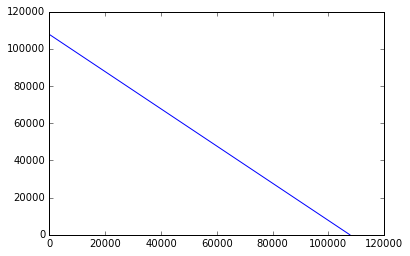

In [13]:
plt.plot(sorted(counts, reverse=True))

In [8]:
len(model_1950_10y.vocab), len(model_1951_10y.vocab)

(692536, 749216)

In [9]:
count1 = {key: val.count for key, val in m1.vocab.iteritems()}
count2 = {key: val.count for key, val in m2.vocab.iteritems()}

In [10]:
vocab_count_sorted1 = sorted(count1, key=count1.get, reverse=True)
vocab_count_sorted2 = sorted(count2, key=count2.get, reverse=True)

In [11]:
count_list1 = [count for word, count in count1.iteritems()]
count_list2 = [count for word, count in count2.iteritems()]

In [12]:
np.sum(count_list1), np.sum(count_list2)

(355987241, 390568219)

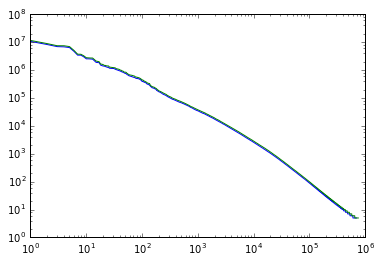

In [13]:
plt.loglog(sorted(count_list1, reverse=True))
plt.loglog(sorted(count_list2, reverse=True))

In [14]:
vocab_combined = list(set(model_1950_10y.vocab.keys()).union(set(model_1951_10y.vocab.keys())))

In [15]:
count_combined = []
for w in vocab_combined:
    try:
        c1 = m1.vocab[w].count
    except KeyError:
        c1 = 0
    try:
        c2 = m2.vocab[w].count
    except KeyError:
        c2 = 0
    count_combined.append(c1 + c2)

In [16]:
vocab_comb_sort = [x for y, x in sorted(zip(count_combined, vocab_combined), reverse=True)]
count_comb_sort = sorted(count_combined, reverse=True)

In [19]:
p_word_comb_sort = np.array(count_comb_sort) / float(np.sum(count_comb_sort))

In [62]:
N_val_words = 1000

In [21]:
val_words = list(np.random.choice(vocab_comb_sort, size=N_val_words, replace=False, p=p_word_comb_sort))

In [22]:
topN_sim = 50

In [23]:
def jaccard_similarity(set1, set2):
    return len(set1.intersection(set2)) / float(len(set1.union(set2)))

In [24]:
p_word_comb_sort_dict = dict(zip(vocab_comb_sort, p_word_comb_sort))

In [25]:
# val_p = []
# val_jaccard = []
# for val_word in val_words:
#     val_p.append(p_word_comb_sort_dict[val_word])

#     try:
#         sim_words1 = [word for word, _ in m1.most_similar(val_word, topn=topN_sim)]
#         sim_words2 = [word for word, _ in m2.most_similar(val_word, topn=topN_sim)]
#         val_jaccard.append(jaccard_similarity(set(sim_words1), set(sim_words2)))
#     except KeyError:
#         val_jaccard.append(0.)

val_p = pickle.load(open('probval2_data/val_p_top50_1000words.pickle', 'r'))
val_words = pickle.load(open('probval2_data/val_words_top50_1000words.pickle', 'r'))
val_jaccard = pickle.load(open('probval2_data/val_jaccard_top50_1000words.pickle', 'r'))

In [26]:
pickle.dump(val_p, open('probval2_data/val_p_top50_1000words.pickle', 'w'), protocol=2)
pickle.dump(val_words, open('probval2_data/val_words_top50_1000words.pickle', 'w'), protocol=2)
pickle.dump(val_jaccard, open('probval2_data/val_jaccard_top50_1000words.pickle', 'w'), protocol=2)

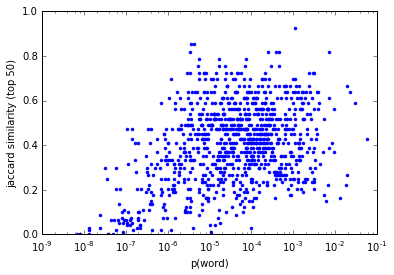

In [27]:
plt.semilogx(val_p, val_jaccard, '.')
plt.xlabel('p(word)')
plt.ylabel('jaccard similarity (top 50)')

In [28]:
trace0 = plgo.Scatter(
  x=val_p,
  y=val_jaccard,
  text=val_words,
  mode="markers"
)
# trace1 = plgo.Scatter(
#   x=[1, 2, 3, 4],
#   y=[16, 5, 11, 9]
# )
data = plgo.Data([trace0,])#, trace1])
layout = plgo.Layout(
    xaxis=dict(
        type='log',
        autorange=True
    ),
    yaxis=dict(
        type='lin',
        autorange=True
    ),
    hovermode = 'closest',
#     width=500,
    height=700,
)
fig = plgo.Figure(data=data, layout=layout)
ply.iplot(fig)

# ply.iplot(data, filename = 'basic-line')

In [29]:
m1.most_similar('zijn')

[(u'z\xfcn', 0.8560155034065247),
 (u'zrjn', 0.8366921544075012),
 (u'zyn', 0.8275719881057739),
 (u'zjjn', 0.7892638444900513),
 (u'ziin', 0.7694714665412903),
 (u'ztjn', 0.7418159246444702),
 (u'zun', 0.7395227551460266),
 (u'zfln', 0.7272780537605286),
 (u'znn', 0.7247384190559387),
 (u'zqn', 0.6712801456451416)]

In [30]:
m1.vocab['zijn'].count / float(np.sum(count_list1)) / (m1.vocab['zrjn'].count / float(np.sum(count_list1)))

330.3362508164598

In [31]:
m1.most_similar('soestdijk')

[(u'soestd\xfck', 0.5641106963157654),
 (u'socstdijk', 0.5477716326713562),
 (u'soestdiik', 0.5407779216766357),
 (u'soestdjjk', 0.5311074256896973),
 (u'sommelsdijk', 0.5250560641288757),
 (u'soestdrjk', 0.5139874815940857),
 (u'sloterdijk', 0.512660801410675),
 (u'laeken', 0.5081022381782532),
 (u'soestdyk', 0.4955380856990814),
 (u'malacanan', 0.49514538049697876)]

In [32]:
m1.vocab['zijn'].count / m1.vocab['soestdijk'].count

779

# Dictionary filter
Filter out everything that is not in the (BWNT05) dictionary.

In [39]:
dictionary_words = []
with open(shico_dn + 'BWNT05_3.0.1/BWNT05_v003.txt', 'rb') as csvfile:
    dictreader = csv.reader(csvfile, delimiter=';')
    for row in dictreader:
        dictionary_words.append(row[3])

In [66]:
word_comb_dictfilt = list(set(vocab_comb_sort).intersection(dictionary_words))

/home/patrick/miniconda2/envs/shico/lib/python2.7/site-packages/ipykernel/__main__.py:1: UnicodeWarning:

Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal



In [67]:
len(word_comb_dictfilt)

68056

In [68]:
p_word_comb_dictfilt_dict = {word: p_word_comb_sort_dict[word] for word in word_comb_dictfilt}

In [69]:
norm = sum(p for p in p_word_comb_dictfilt_dict.values())
p_word_comb_dictfilt_dict = {word: p/norm for word, p in p_word_comb_dictfilt_dict.iteritems()}

In [70]:
p_word_comb_dictfilt = [p_word_comb_dictfilt_dict[w] for w in word_comb_dictfilt]

In [71]:
sum(p for p in p_word_comb_dictfilt)

1.0000000000000113

In [72]:
val_words_dictfilt = list(np.random.choice(word_comb_dictfilt, size=N_val_words, replace=False, p=p_word_comb_dictfilt))

In [80]:
N_max_expected_crap = 50

In [87]:
val_p_dictfilt = []
val_jaccard_dictfilt = []
for val_word in val_words_dictfilt:
    val_p_dictfilt.append(p_word_comb_dictfilt_dict[val_word])

    try:
        sim1 = {w: s for w, s in m1.most_similar(val_word, topn=topN_sim + N_max_expected_crap)}
        sim2 = {w: s for w, s in m2.most_similar(val_word, topn=topN_sim + N_max_expected_crap)}
        sim_words1 = set(sim1.keys()).intersection(dictionary_words)
        sim_words1_dictfilt_dict = {w: sim1[w] for w in sim_words1}
        sim_words1_dictfilt = sorted(sim_words1_dictfilt_dict.keys(), key=sim_words1_dictfilt_dict.get)[:topN_sim]
        sim_words2 = set(sim2.keys()).intersection(dictionary_words)
        sim_words2_dictfilt_dict = {w: sim2[w] for w in sim_words2}
        sim_words2_dictfilt = sorted(sim_words2_dictfilt_dict.keys(), key=sim_words2_dictfilt_dict.get)[:topN_sim]
        val_jaccard_dictfilt.append(jaccard_similarity(set(sim_words1_dictfilt), set(sim_words2_dictfilt)))
    except KeyError:
        val_jaccard_dictfilt.append(0.)
    except ZeroDivisionError:
        val_jaccard_dictfilt.append(0.)

/home/patrick/miniconda2/envs/shico/lib/python2.7/site-packages/ipykernel/__main__.py:9: UnicodeWarning:

Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal

/home/patrick/miniconda2/envs/shico/lib/python2.7/site-packages/ipykernel/__main__.py:12: UnicodeWarning:

Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal



In [ ]:
val_p_dictfilt = pickle.load(open('probval2_data/val_p_dictfilt_top50_1000words.pickle', 'r'))
val_words_dictfilt = pickle.load(open('probval2_data/val_words_dictfilt_top50_1000words.pickle', 'r'))
val_jaccard_dictfilt = pickle.load(open('probval2_data/val_jaccard_dictfilt_top50_1000words.pickle', 'r'))

In [88]:
pickle.dump(val_p_dictfilt, open('probval2_data/val_p_dictfilt_top50_1000words.pickle', 'w'), protocol=2)
pickle.dump(val_words_dictfilt, open('probval2_data/val_words_dictfilt_top50_1000words.pickle', 'w'), protocol=2)
pickle.dump(val_jaccard_dictfilt, open('probval2_data/val_jaccard_dictfilt_top50_1000words.pickle', 'w'), protocol=2)

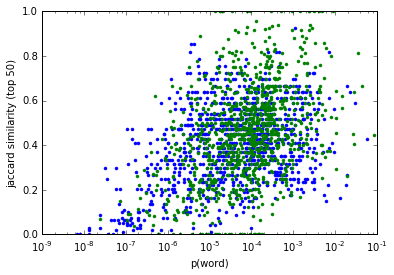

In [89]:
plt.semilogx(val_p, val_jaccard, '.b')
plt.semilogx(val_p_dictfilt, val_jaccard_dictfilt, '.g')
plt.xlabel('p(word)')
plt.ylabel('jaccard similarity (top 50)')

In [246]:
def plot_hist2d(x, y, bins, ax=None, xmin=None, xmax=None):
    if xmin is None:
        xmin = min(x)
    if xmax is None:
        xmax = max(x)
    xbins = 10**np.linspace(np.floor(np.log10(xmin)), np.ceil(np.log10(xmax)), bins)
    ybins = np.linspace(0, 1, bins)

    counts, _, _ = np.histogram2d(y, x, bins=(ybins, xbins))

    if ax is None:
        fig, ax = plt.subplots()

    ax.pcolormesh(xbins, ybins, counts)
    ax.set_xscale('log')
    
#     y_bin = (ybins[1:] + ybins[:-1]) / 2.
#     y_weight = np.nan_to_num(counts / counts.sum(axis=0))
#     y_mean = np.sum(y_bin[:,None] * y_weight, axis=0)
# #     y_std = counts.std(axis=0)
    x_bin = 10**((np.log10(xbins[1:]) + np.log10(xbins[:-1]))/2.)
    
    xy_binned_by_x = {ix: [] for ix in range(len(xbins)-1)}
    for ix in range(len(x)):
        xy_binned_by_x[xbins.searchsorted(x[ix])-1].append((x[ix], y[ix]))
    xy_binned_by_x = {ix: np.array(ding) for ix, ding in xy_binned_by_x.iteritems()}
    
    x_plot = []
    y_plot = []
    yerr_plot = []
    for ix in range(len(xbins)-1):
        if len(xy_binned_by_x[ix]) > 0:
            x_plot.append(x_bin[ix])
            y_plot.append(xy_binned_by_x[ix][:,1].mean())
            yerr_plot.append(xy_binned_by_x[ix][:,1].std())
    
    ax.errorbar(x_plot, y_plot, yerr=yerr_plot)
    
    ax.set_ylim(0, 1)
        
    return xmin, xmax, counts

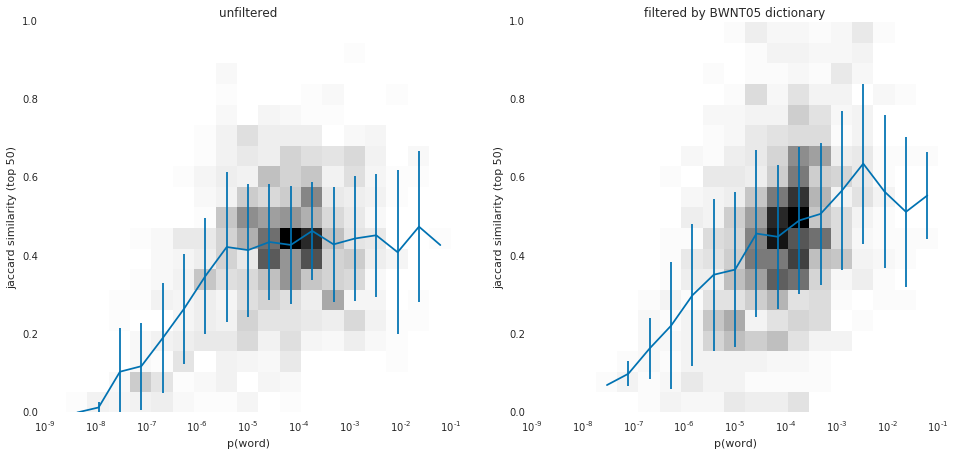

In [249]:
Nbins = 20
with plt.style.context(['seaborn-notebook', 'seaborn-darkgrid', 'seaborn-colorblind']):
    fig, ax = plt.subplots(1, 2, figsize=(16,7))
    xmin, xmax, c = plot_hist2d(val_p, val_jaccard, Nbins, ax=ax[0])
    ax[0].set_xlabel('p(word)')
    ax[0].set_ylabel('jaccard similarity (top 50)')
    ax[0].set_title('unfiltered')
    _, _, _ = plot_hist2d(val_p_dictfilt, val_jaccard_dictfilt, Nbins, ax=ax[1], xmin=xmin, xmax=xmax)
    ax[1].set_title('filtered by BWNT05 dictionary')
    ax[1].set_xlabel('p(word)')
    ax[1].set_ylabel('jaccard similarity (top 50)')

In [139]:
print np.mean(val_jaccard), np.std(val_jaccard)
print np.mean(val_jaccard_dictfilt), np.std(val_jaccard_dictfilt)

0.408348327981 0.172392256727
0.456827772499 0.211101561948


In [91]:
trace0 = plgo.Scatter(
  x=val_p_dictfilt,
  y=val_jaccard_dictfilt,
  text=val_words_dictfilt,
  mode="markers"
)
trace1 = plgo.Scatter(
  x=val_p,
  y=val_jaccard,
  text=val_words,
  mode="markers"
)
data = plgo.Data([trace0, trace1])
layout = plgo.Layout(
    xaxis=dict(
        type='log',
        autorange=True
    ),
    yaxis=dict(
        type='lin',
        autorange=True
    ),
    hovermode = 'closest',
#     width=500,
    height=700,
)
fig = plgo.Figure(data=data, layout=layout)
ply.iplot(fig)

# ply.iplot(data, filename = 'basic-line')

In [106]:
(set(dict(m1.most_similar('het', topn=topN_sim+N_max_expected_crap)).keys()).intersection(dictionary_words), 
set(dict(m2.most_similar('het', topn=topN_sim+N_max_expected_crap)).keys()).intersection(dictionary_words))

({'bovengenoemd',
  'dit',
  'een',
  'eerstgenoemd',
  'hef',
  'hei',
  'hel',
  'hit',
  'hot',
  'hst',
  'iet',
  'laatstgenoemd',
  'tiet',
  'tweehoofdig'},
 {'bovengenoemd',
  'dit',
  'ditzelfde',
  'een',
  'eerstgenoemd',
  'hef',
  'hei',
  'hel',
  'hit',
  'hot',
  'hst',
  'iet',
  'laatstgenoemd',
  'meergenoemd',
  'tiet'})

In [100]:
set(dict(m1.most_similar('minister', topn=topN_sim+N_max_expected_crap)).keys()).intersection(dictionary_words)

/home/patrick/miniconda2/envs/shico/lib/python2.7/site-packages/ipykernel/__main__.py:1: UnicodeWarning:

Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal



{'ambtgenoot',
 'bewindsman',
 'departement',
 'luns',
 'ministerie',
 'onderminister',
 'staatssecretaris',
 'viceminister'}

In [104]:
set(dict(m1.most_similar('maandag', topn=topN_sim+N_max_expected_crap)).keys()).intersection(dictionary_words)

{'april',
 'augustus',
 'december',
 'dinsdag',
 'dinsdagavond',
 'dinsdagmiddag',
 'dinsdagmorgen',
 'dinsdagochtend',
 'donderdag',
 'donderdagavond',
 'donderdagmiddag',
 'donderdagmorgen',
 'donderdagochtend',
 'februari',
 'gisteren',
 'januari',
 'jongstleden',
 'juli',
 'juni',
 'maandagavond',
 'maandagmiddag',
 'maandagmorgen',
 'maandagochtend',
 'maart',
 'mei',
 'nieuwjaarsdag',
 'november',
 'oktober',
 'oudejaarsdag',
 'september',
 'vandaag',
 'vrijdag',
 'vrijdagavond',
 'vrijdagmiddag',
 'vrijdagmorgen',
 'vrijdagochtend',
 'woensdag',
 'woensdagavond',
 'woensdagmiddag',
 'woensdagmorgen',
 'woensdagochtend',
 'zaterdag',
 'zaterdagavond',
 'zaterdagmiddag',
 'zaterdagmorgen',
 'zaterdagochtend',
 'zondag',
 'zondagavond',
 'zondagmiddag',
 'zondagmorgen',
 'zondagochtend'}

In [101]:
m1.most_similar('minister', topn=topN_sim+N_max_expected_crap)

[(u'minisier', 0.7716935873031616),
 (u'minist\xe9r', 0.7338584065437317),
 (u'staatssecretaris', 0.7304750680923462),
 (u'ministei', 0.7206040620803833),
 (u'oudminister', 0.701644778251648),
 (u'minster', 0.688407301902771),
 (u'nister', 0.6845920085906982),
 (u'ministervan', 0.6802278161048889),
 (u'ministers', 0.6520008444786072),
 (u'ministor', 0.6430771946907043),
 (u'ninister', 0.6364973783493042),
 (u'ministerie', 0.632993757724762),
 (u'spinoy', 0.6291888356208801),
 (u'mnister', 0.6266401410102844),
 (u'ministe', 0.6201404333114624),
 (u'mlnister', 0.6148898005485535),
 (u'viceminister', 0.6142911314964294),
 (u'kvpminister', 0.6137517690658569),
 (u'ministar', 0.6114950180053711),
 (u'minis', 0.607969343662262),
 (u'ministet', 0.6034566760063171),
 (u'bewindsman', 0.6017476320266724),
 (u'financi\xebn', 0.6005555987358093),
 (u'ministerpresident', 0.5964834094047546),
 (u'zakenn', 0.596211850643158),
 (u'mmister', 0.5961301922798157),
 (u'jinister', 0.5951021313667297),
 (u'

# Levenshtein filter
We filter by distance 2 or 3; this also takes into account many vervoegingen (e.g. most verbs with 2 and also most singular vs plural with 3).

In [34]:
editdistance.eval('hello', 'hullo')

1L